<a href="https://colab.research.google.com/github/paolaserra/Algorithms-for-massive-datasets/blob/main/Copia_di_ADM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#starting the project

In [ ]:
!lscpu 

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

### **Access Kaggle API, download the "Old Newspapers" dataset and unzip it**

In [ ]:
# upload token file kaggle.json

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"giuliahadjiandrea","key":"fc0ce37d8f89c0421a66fda0695b7b94"}'}

In [ ]:
# move the token file to the ./kaggle directory
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle 
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
# authenticate to the Kaggle API
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
# download and unzip "Old Newspapers" dataset

!kaggle datasets download -d alvations/old-newspapers

100% 2.04G/2.05G [00:19<00:00, 189MB/s]
100% 2.05G/2.05G [00:19<00:00, 115MB/s]


In [ ]:
!unzip old-newspapers.zip

Archive:  old-newspapers.zip
  inflating: old-newspaper.tsv       


### **Initialize a SparkContext object**


In [ ]:
# check number of available cores

!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
# initialize a SparkContext object 

! pip install pyspark
import pyspark
sc = pyspark.SparkContext()

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 36.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=d3d7f4ca54375e5b4872f958000852768e0e4bf72e98ce2c90f790e82697ee6c
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
#install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null  


In [ ]:
# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz


In [ ]:
# unzip the spark file to the current folder
!tar xf spark-3.0.2-bin-hadoop3.2.tgz

#install findspark
!pip install -q findspark

In [ ]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init("spark-3.0.2-bin-hadoop3.2")  #SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

**PREPROCESSING**

Content
The columns of each row in the .tsv file are:

Langauge: Language of the text.

Source: Newspaper from which the text is from.

Date: Date of the article that contains the text.

Text: Sentence/paragraph from the newspaper


In [ ]:
#DATASET to DF
import pandas
df = spark.read.csv("/content/old-newspaper.tsv", sep=r'\t', header=True)

In [ ]:
df.head(1)

[Row(Language='Afrikaans', Source='republikein.com.na', Date='2011/09/14', Text='Die veranderinge aan die Britsgeboude Avensis sluit in hersiene stilering aan die buitekant, wat n voorkantontwerp ingevolge Toyota se nuwe ontwerpstyl insluit.')]

In [ ]:
english = df[df.Language == 'English']

In [ ]:
english.show()

+--------+------------------+----------+--------------------+
|Language|            Source|      Date|                Text|
+--------+------------------+----------+--------------------+
| English|       latimes.com|2012/04/29|He wasn't home al...|
| English|      stltoday.com|2011/07/10|The St. Louis pla...|
| English|         freep.com|2012/05/07|WSU's plans quick...|
| English|            nj.com|2011/02/05|The Alaimo Group ...|
| English|        sacbee.com|2011/10/02|And when it's oft...|
| English|     cleveland.com|2012/04/27|There was a certa...|
| English|         freep.com|2012/05/03|14915 Charlevoix,...|
| English|            nj.com|2011/02/02|"""It’s just anot...|
| English|chicagotribune.com|2012/01/05|But time and agai...|
| English|      indystar.com|2012/05/04|I was just trying...|
| English|   startribune.com|2012/04/25|MHTA President an...|
| English|           ajc.com|2012/05/04|"""The absurdity ...|
| English|     cleveland.com|2009/05/29|"GM labor relatio...|
| Englis

In [ ]:
# create an RDD from the "Old Newspapers" dataset and display the first instance. 
#Resilient Distributed Datasets (RDD) is the fundamental data structure of Spark. RDDs are immutable and fault tolerant in nature. 
#These are distributed collections of objects. The datasets are divided into a logical partition, which is further computed on different nodes over the cluster. 
#Thus, RDD is just the way of representing dataset distributed across multiple machines, which can be operated around in parallel.
# RDDs are called resilient because they have the ability to always re-compute an RDD. 

newsRDD = sc.textFile("old-newspaper.tsv", 2)
newsRDD.take(1)

['Language\tSource\tDate\tText']

In [ ]:
def split_row(x):

  tup = x.split('''\t''')
  
  date = tup[2]
  year = date[:4]  

  return (tup[0], year, tup[3])

In [ ]:
subRDD = newsRDD.map(split_row)
subRDD.take(1)

[('Language', 'Date', 'Text')]

In [ ]:
# count by years

subRDD.map(lambda r: r[1]).countByValue()

defaultdict(int,
            {'1970': 6,
             '2000': 6075,
             '2001': 7811,
             '2002': 6183,
             '2003': 8452,
             '2004': 20091,
             '2005': 77733,
             '2006': 169678,
             '2007': 369179,
             '2008': 687741,
             '2009': 1494895,
             '2010': 3207680,
             '2011': 7247763,
             '2012': 2812367,
             '2013': 380469,
             'Date': 1,
             'UNKN': 309918})

In [ ]:

subRDD.map(lambda r: r[0]).countByValue()

defaultdict(int,
            {'Afrikaans': 152312,
             'Albanian': 228553,
             'Amharic': 32553,
             'Arabic': 202461,
             'Armenian': 156586,
             'Azerbaijan': 140995,
             'Bengali': 58998,
             'Bosnian': 181370,
             'Catalan': 81893,
             'Chinese (Simplified)': 682472,
             'Chinese (Traditional)': 333735,
             'Croatian': 227317,
             'Czech': 276881,
             'Danish': 887016,
             'Dutch': 232176,
             'English': 1010242,
             'Farsi': 306846,
             'Finnish': 485758,
             'French': 358001,
             'Galician': 227073,
             'Georgian': 164614,
             'German': 244743,
             'Greek': 230405,
             'Hebrew': 199047,
             'Hindi': 115445,
             'Hungarian': 245685,
             'Icelandic': 39093,
             'Indonesian': 781521,
             'Italian': 169630,
             'Japanese': 3129

In [ ]:
# look directly at those with year = 'Date' or year = '1970'

subRDD.filter(lambda r: r[1]=='Date' or r[1]=='1970').collect()

[('Language', 'Date', 'Text'),
 ('French',
  '1970',
  "Habitué depuis deux ans à faire venir des attaquants au mercato hivernal (Quercia en 2008 et Birsa en 2009), Jean Fernandez justifie les arrivées de Jo-Gook et Fall comme des choix « d'avenir ». Et éclaire sur la capacité de ces joueurs à réussir à court terme. « L'expérience me fait dire qu'il y a plus d'échecs que de réussite au mercato d'hiver. Lorsque j'étais à Marseille, Maoulida et Pagis avaient été de bonnes recrues »."),
 ('French',
  '1970',
  "Deux joueurs qui n'ont rien coûté, ou presque, à l'AJA fidèle à sa stratégie de recruter malin. Jo-Gook, auteur d'une apparition en Coupe de France et une en Ligue 1, a confirmé que « le Patriot », comme il est surnommé en Corée du Sud, aura besoin de quelques mois d'adaptation."),
 ('French',
  '1970',
  "Ce que l'on sait, d'ores-et-déjà, c'est que Jelen (en fin de contrat en juin) a peu de chances d'en faire partie. La tendance de l'hiver ne sera peut-être pas celle de l'été, cer

In [ ]:
# look at the language in which the ones with unknown date were written

subRDD.filter(lambda r: r[1]=='UNKN').map(lambda r: r[0]).countByValue()  # all in Spanish

defaultdict(int, {'Spanish': 309918})

In [ ]:
textFrench = subRDD.filter(lambda x: x[0]=='French').map(lambda r: r[0]).countByValue()

In [ ]:
textFrench

defaultdict(int, {'French': 358001})

In [ ]:
textRDD_Eng = subRDD.filter(lambda x: x[0]=='English')
textRDD_Eng.take(5)

[('English', '2012', "He wasn't home alone, apparently."),
 ('English',
  '2011',
  'The St. Louis plant had to close. It would die of old age. Workers had been making cars there since the onset of mass automotive production in the 1920s.'),
 ('English',
  '2012',
  "WSU's plans quickly became a hot topic on local online sites. Though most people applauded plans for the new biomedical center, many deplored the potential loss of the building."),
 ('English',
  '2011',
  'The Alaimo Group of Mount Holly was up for a contract last fall to evaluate and suggest improvements to Trenton Water Works. But campaign finance records released this week show the two employees donated a total of $4,500 to the political action committee (PAC) Partners for Progress in early June. Partners for Progress reported it gave more than $10,000 in both direct and in-kind contributions to Mayor Tony Mack in the two weeks leading up to his victory in the mayoral runoff election June 15.'),
 ('English',
  '2011',


In [ ]:
textRDD_Eng = textRDD_Eng.sample(withReplacement = False, fraction = 0.1, seed = 1995).repartition(2)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re

from nltk.corpus import stopwords

from numpy import unique
from string import punctuation

def preprocess(row):

  ### ARGS
  # row = (language, date, text)

  ### OUTPUT
  # list of lemmatized tokens in the text field

  ### REQUIRES
  # libraries: nltk, re, numpy.unique, string.punctuation
  # modules (nltk): stopwords, punkt, wordnet 

  if row[0] == 'English':
    sw = stopwords.words("english") + list(punctuation) + ["n't", "'m", "'d", "'re", "'s","'ve", "'ll", '``', "''", "--", '“', '’','”','...',"«", "»", "–"]

  text = re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', row[2])

  lemmatizer = nltk.WordNetLemmatizer()
  tokenized_text = nltk.word_tokenize(text.lower())
  tokenized_text = list(unique(tokenized_text))

  return [lemmatizer.lemmatize(w) for w in tokenized_text if w not in sw]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text_tokenized = textRDD_Eng.map(preprocess)
text_tokenized.take(5)

[['charged',
  'controlled',
  'dangerous',
  'gattone',
  'paraphernalia',
  'possession',
  'substance'],
 ['13',
  '14',
  '18th',
  '21',
  '23',
  '26th',
  'alex',
  'among',
  'barret',
  'behind',
  'blue',
  'come',
  'credit',
  'defense',
  'defensemen',
  'deserves',
  'enough',
  'gaudy',
  'goalie',
  'good',
  'jackman',
  'kevin',
  'league',
  'much',
  'net',
  'outstanding',
  'petro',
  'pietrangelo',
  'played',
  'plus17',
  'point',
  'produce',
  'protect',
  'rank',
  'rank',
  'right',
  'season',
  'shattenkirk',
  'shatty',
  'stats',
  'three',
  'top'],
 ['15',
  '26yearold',
  '9to5',
  'admittedly',
  'athletic',
  'basketball',
  'basketball',
  'beckoned',
  'behind',
  'bob',
  'bowie',
  'business',
  'coach',
  'collegeage',
  'comedian',
  'continued',
  'court',
  'daughter',
  'day',
  'director',
  'existence',
  'experience',
  'filed',
  'general',
  'glistening',
  'guard/standup',
  'halfdozen',
  'hardwood',
  'help',
  'hoop',
  'hosley',


In [ ]:
textRDD_Eng.take(5), text_tokenized.take(5)

([('English',
   '2010',
   'Gattone was charged with possession of a controlled dangerous substance and possession of paraphernalia.'),
  ('English',
   '2012',
   "Then comes the defense, which has played outstanding all season and deserves much credit for those gaudy goalie stats. And not only do they protect the net, they produce. Kevin Shattenkirk's 23 points ranks 18th in the league among defensemen and Alex Pietrangelo comes in right behind him with 21 points, good enough for 26th among defensemen. And with Shatty (plus-17), Petro (+14) and Barret Jackman (+13), the Blues have three defensemen who rank in the top"),
  ('English',
   '2012',
   'The glistening court beckoned. As Bowie filed onto the hardwood behind 26-year-old guard/stand-up comedian Terry Hosley, general manager John Wolfe — a man with admittedly no basketball experience — looked on from the sideline. Coach Bob Topp, who spent much of the day working 15 miles down the road as a middle-school athletic director, r

(0.0, 120.0)

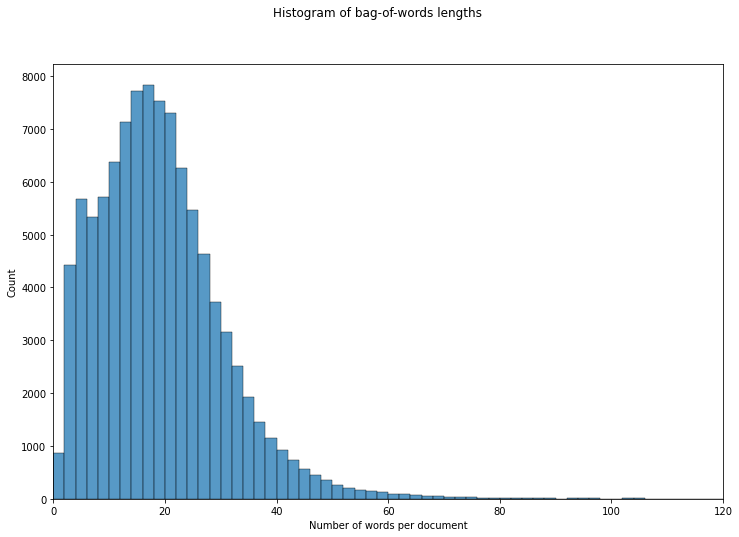

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
lengths = text_tokenized.map(len) \
                       .collect()

f, ax = plt.subplots(figsize = (12,8))
sns.histplot(data = lengths, binwidth = 2, ax = ax)
ax.set_xlabel("Number of words per document")
f.suptitle("Histogram of bag-of-words lengths")
plt.xlim([0, 120])

In [ ]:
text_tokenized.map(len).countByValue()

## **A-Priori Algorithm**

In [ ]:
# SINGLETONS
# define function to iteratively sum counters of equal words

def sumcum(x,y):
  return x+y

In [ ]:
import itertools

In [ ]:
threshold = 0.01

In [ ]:
#eng counters

freq_items = text_tokenized.flatMap(lambda bow: [(word, 1) for word in bow]) \
                                 .reduceByKey(sumcum) \
                                 .filter(lambda t: t[1] >= threshold*N) \
                                 .collect()

In [ ]:
#eng singletons
freq_singletons = list(map(lambda x: x[0], freq_items))

In [ ]:
counters_1perc = []
counters_1perc.append(len(freq_singletons))

In [ ]:
candidates = list(itertools.combinations(freq_singletons, 2))
candidates = list(map(set, candidates))

In [ ]:
### FIND CANDIDATE ITEMSETS IN THE ROWS OF RDD: PLAN A

def candidate_combinations(bow, candidates):

  return [(tuple(c), 1) for c in candidates if c.issubset(set(bow))]

In [ ]:
### FIND CANDIDATE ITEMSETS IN THE ROWS OF RDD: PLAN B

from numpy import searchsorted

def find_in_bow(candidates, bow):

  output = []

  for itemset in candidates:
    for item in itemset:
      x = searchsorted(bow, item)
      if (x >= len(bow) or bow[x] != item):
        break
    else:
      output.append((itemset, 1))

  return output

In [ ]:
### FIND CANDIDATE ITEMSETS IN THE ROWS OF RDD: PLAN C

# requires candidates to be all of equal length

def candidates_with_itertools(bow, candidates):

  K = len(candidates[0])

  combos = list(itertools.combinations(bow, K))

  combos = list(filter(lambda c: set(c) in candidates, combos))

  combos = list(map(lambda c: (c,1), combos))

  return combos

In [ ]:
# testing which function is the fastest

from time import time

testbows = text_tokenized.takeSample(withReplacement = False, num = 100, seed = 1262)

start = time()
[candidate_combinations(bow, candidates) for bow in testbows]
time_cc = time() - start

start = time()
[find_in_bow(candidates, bow) for bow in testbows]
time_fib = time() - start

start = time()
[candidates_with_itertools(bow, candidates) for bow in testbows]
time_cwi = time() - start

time_cc, time_fib, time_cwi       

In [ ]:
#eng frequent pairs - it takes 35min for running
new_freq_itemsets = text_tokenized.flatMap(lambda bow: candidate_combinations(bow, candidates)) \
                       .reduceByKey(sumcum) \
                       .filter(lambda t: t[1] >= threshold*N) \
                       .collect()

In [ ]:
#eng pairs with counters
old_freq_itemsets = list(map(lambda x: x[0], new_freq_itemsets))

In [ ]:
#length frequent eng pairs
counters_1perc.append(len(old_freq_itemsets))

In [ ]:
### FIND CANDIDATE ITEMSETS OF CARDINALITY K GIVEN FREQUENT ITEMSETS OF CARDINALITY K-1, FOR K > 2
# we don't need all combinations of elements of frequent itemsets,
# but itemsets whose immediate subsets are ALL frequent
# the next function is to be used for K > 2, whereas for K = 2 we may simply use itertools.combinations()

def find_candidate_itemsets(old_freq_itemsets, K):

  ### ARGS
  # old_freq_itemsets --> list of itemsets that were found to be frequent in previous pass
  # K --> cardinality of new candidate itemsets

  ### OUTPUT
  # list of candidate itemsets, as sets

  ### REQUIRES
  # libraries: itertools

  candidates = []

  for comb in list(itertools.combinations(old_freq_itemsets, K)):               # for each combination of K itemsets, e.g. [('a','b'),('c','a'),('b','c')]
    cand = set().union(*comb)                                                   # define the union set, e.g. {'a','b','c'}
    if len(cand) == K:
      candidates.append(cand)                                                   # and let the union be a candidate itemset if its cardinality is K

  return candidates                                                             # returns list of sets

In [ ]:
candidates = find_candidate_itemsets(old_freq_itemsets, K = 3)
new_freq_itemsets3 = text_tokenized.flatMap(lambda bow: candidate_combinations(bow, candidates)) \
                       .reduceByKey(sumcum) \
                       .filter(lambda t: t[1] >= threshold*N) \
                       .collect()

In [ ]:
len(new_freq_itemsets3)

In [ ]:
counters_1perc

**Threshold = 0.2**

In [ ]:
threshold = 0.02

In [ ]:
# sum all counters to obtain singleton counts

freq_items = text_tokenized.flatMap(lambda bow: [(word, 1) for word in bow]) \
                                 .reduceByKey(sumcum) \
                                 .filter(lambda t: t[1] >= threshold*N) \
                                 .collect()

In [ ]:
# filters the counters exceeding the threshold

freq_singletons = list(map(lambda x: x[0], freq_items))

In [ ]:
#computing the length of frequent singletons in english

counters_2perc = []

counters_2perc.append(len(freq_singletons))

Which are the frequent singletons, weighted by their frequency?

In [ ]:
#importing the libraries for depicting the wordcloud

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#defining a function for converting lists into strings

def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)

In [ ]:
#converting the list of freq_singletons in strings

string = convert_list_to_string(freq_singletons)

In [ ]:
#defining the worldcloud

wordcloud = WordCloud(background_color = "white").generate(string)

# displaying the wordcloud

plt.figure(figsize = (14, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

# it might be different each time due to sampling

Now we turn to itemsets of cardinality > 1

In [ ]:
candidates = list(itertools.combinations(freq_singletons, 2))
candidates = list(map(set, candidates))

In [ ]:
# use candidate_combinations to count occurrences of candidates in the RDD -35 minutes to run

new_freq_itemsets = text_tokenized.flatMap(lambda bow: candidate_combinations(bow, candidates)) \
                       .reduceByKey(sumcum) \
                       .filter(lambda t: t[1] >= threshold*N) \
                       .collect()

In [ ]:
# check the lenghts of the list containing the frequent pairs

counters_2perc.append(len(new_freq_itemsets))                                   # needless to go futher, since also for threshold = 1% there were no triplets

In [ ]:
counters_2perc

**Threshold = 0.03**

In [ ]:
threshold = 0.03

In [ ]:
freq_items = text_tokenized.flatMap(lambda bow: [(word, 1) for word in bow]) \
                                 .reduceByKey(sumcum) \
                                 .filter(lambda t: t[1] >= threshold*N) \
                                 .collect()

In [ ]:
freq_singletons = list(map(lambda x: x[0], freq_items))

In [ ]:
counters_3perc = []

counters_3perc.append(len(freq_singletons))

In [ ]:
new_freq_itemsets = text_tokenized.flatMap(lambda bow: candidate_combinations(bow, candidates)) \
                       .reduceByKey(sumcum) \
                       .filter(lambda t: t[1] >= threshold*N) \
                       .collect()

In [ ]:
old_freq_itemsets = list(map(lambda x: x[0], new_freq_itemsets))

In [ ]:
counters_3perc.append(len(old_freq_itemsets))

In [ ]:
counters_3perc

**Plot of counters of frequent itemsets**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
counters_per_threshold = [counters_1perc, counters_2perc, counters_3perc]

counters_per_threshold = pd.DataFrame(counters_per_threshold)
counters_per_threshold.columns = ['1','2']
counters_per_threshold['thresholds'] = [0.01, 0.02, 0.03]
df = pd.melt(counters_per_threshold, id_vars="thresholds", var_name="cardinality", value_name="numbers")

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(x = 'thresholds', y = 'numbers', hue = 'cardinality', data = df, ax = ax)
f.suptitle("Counts of frequent itemsets per threshold")